In [1]:
import pandas as pd
import sklearn.linear_model as lm
import tensorflow as tf
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
def build_model():
    model=keras.Sequential([\
        layers.Dense(80,activation='relu',input_shape=[X.shape[1]],name='Input'),
        layers.Dense(40,activation='relu',name='Relu'),
        layers.Dense(Y.shape[1])],name='Output')
    optimizer=keras.optimizers.RMSprop(1e-6)
    model.compile(loss='mse',optimizer=optimizer)
    print(model.summary())
    return model

In [13]:
import pickle
import numpy as np
data= pickle.load(open(r"C:\Users\Joydeep\Documents\group2\Training Data\OPE_Coefficient.bin", "rb"))
l=np.shape(data)
X=data[:,0:(l[1]-4)]
np.shape(X)
Y=data[:,l[1]-4:l[1]]
del(data)

In [16]:
EPOCHS=60
model=build_model()
from keras.utils.vis_utils import plot_model
##and plot it
plot_model(model, to_file='CBRegressorNN.png', show_shapes=True, show_layer_names=True)
# implement early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history=model.fit(X,Y,epochs=EPOCHS,validation_split=0.2)

Model: "Output"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 80)                8080      
_________________________________________________________________
Relu (Dense)                 (None, 40)                3240      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 164       
Total params: 11,484
Trainable params: 11,484
Non-trainable params: 0
_________________________________________________________________
None
Train on 80000 samples, validate on 20000 samples
Epoch 1/60
80000/80000 [==============================] - 3s 32us/step - loss: 0.9567 - val_loss: 0.3039
Epoch 2/60
80000/80000 [==============================] - 2s 26us/step - loss: 0.1482 - val_loss: 0.0927
Epoch 3/60
80000/80000 [==============================] - 2s 26us/step - loss: 0.0842 - val_loss: 0.0801
Epoch 4/60
80000

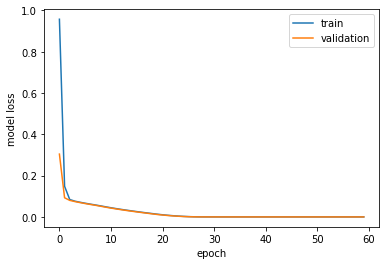

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [23]:
def block(n,x):
    return hyp2f1(n,n,2*n,x)*(x**n)

def generate_functions(number,term_num,n,x_num):
    X=[]
    Y=[]
    x=np.linspace(-0.8,0.8,x_num)
    for p in range(number):
        an=np.random.random((term_num))
        fx=0
        for m in range(term_num):
            fx+=an[m]*block(m,x)
        X.append(fx)
        #Y.append(an[n])
        Y.append(an[n]*block(n,np.linspace(-0.8,0.8,4)))
    X=np.array(X)
    Y=np.array(Y)
    return X,Y

In [27]:
from scipy.special import hyp2f1

In [28]:

term_num=5
n=2
x_num=100

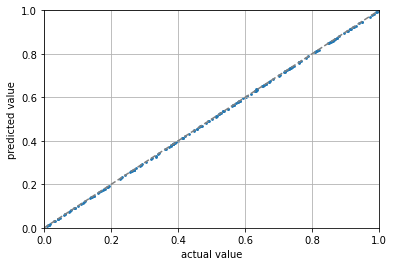

In [29]:
X_test, Y_test=generate_functions(200,term_num,n,x_num)
Y_pred=model.predict(X_test)
x=np.median(Y_test/block(n,np.linspace(-0.8,0.8,4)),axis=1)
y=np.median(Y_pred/block(n,np.linspace(-0.8,0.8,4)),axis=1)
plt.grid(axis='both')
plt.plot([0,1],[0,1],ls='--',c='gray')
plt.ylabel('predicted value')
plt.xlabel('actual value')
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(x,y,s=3)
plt.show()